## Deep Learning ANN Model with Unstructured Data to perform message classification.

In [1]:
! python -c 'tensorflow' || pip tensorflow --user

In [2]:
import tensorflow as tf
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

### Importing required text processing libraries 

In [3]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mail2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mail2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mail2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Creating Text Representations 

#### Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [4]:
# Load Spam Data and review content
spam_data = pd.read_csv('Spam-Classification.csv')

print('\n Loaded Data :\n-----------------------')
print(spam_data.head())


 Loaded Data :
-----------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [5]:
# Separate feature and target data
spam_classes_raw = spam_data['CLASS']
spam_messages = spam_data['SMS']

In [6]:
# Custom tokenizer to tokenize sentences, remove stopwords and use lemmatization 
def customtokenize(str):
    #Split string as tokens
    tokens = nltk.word_tokenize(str)
    # Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    # Perform lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

# Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages)

#convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build a label encoder for target variable to convert strings to numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print("TF-IDF Matrix Shape: ", tfidf_array.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

#Convert target to one-hot encoding vector
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_array, spam_classes, test_size= 0.10)


TF-IDF Matrix Shape:  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


### Building and Evaluating a Deep Learning Model for Spam Classification

In [7]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Number of classes in the target variables
NB_Classes = 2
N_HIDDEN = 32

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

#Add a first hidden layer with relu activation
model.add(keras.layers.Dense(N_HIDDEN, input_shape =(X_train.shape[1], ), name='Hidden-Layer-1', activation='relu'))

#Add a second hidden layer with relu activation
model.add(keras.layers.Dense(N_HIDDEN, name ='Hidden-Layer-2', activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_Classes, name='Output-Layer-3', activation='softmax'))

#Compile the model with loss and metrics
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer-3 (Dense)      (None, 2)                 66        
                                                                 
Total params: 147,266
Trainable params: 147,266
Non-trainable params: 0
_________________________________________________________________


### Training a model


Training Progess: 
-----------------
Epoch 1/10
5/5 [==============================] - 1s 67ms/step - loss: 0.6874 - accuracy: 0.6806 - val_loss: 0.6695 - val_accuracy: 0.7556
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6478 - accuracy: 0.9222 - val_loss: 0.6282 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.5904 - accuracy: 0.9769 - val_loss: 0.5803 - val_accuracy: 0.9296
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 0.5262 - accuracy: 0.9852 - val_loss: 0.5292 - val_accuracy: 0.9407
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.4598 - accuracy: 0.9889 - val_loss: 0.4801 - val_accuracy: 0.9333
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.3977 - accuracy: 0.9898 - val_loss: 0.4349 - val_accuracy: 0.9370
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.3416 - accuracy: 0.9917 - val_loss: 0.3957 - val_accura

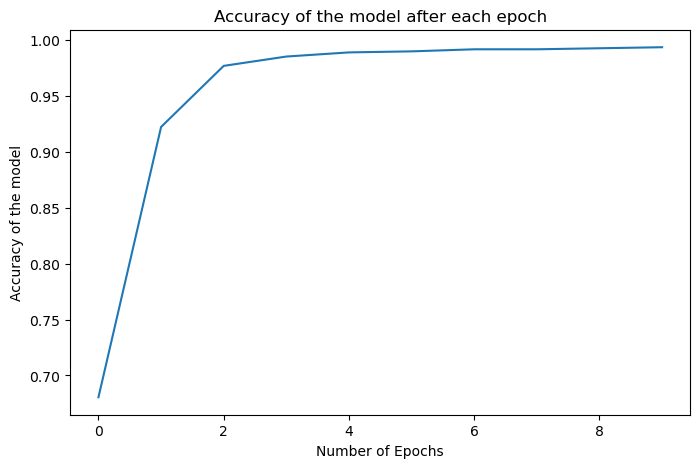


Evaluation against the test dataset: 
-----------------
5/5 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.9733


[0.29733768105506897, 0.9733333587646484]

In [8]:
# Making it versbose to view the progress
VERBOSE = 1

# Setting up Hyper Parameters for training

# Set Batch Size
BATCH_SIZE = 256

#Set number of epochs
EPOCHS = 10

#Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

print("\nTraining Progess: \n-----------------")

#Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, backpropagation 
#and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training Progess: \n-----------------")
import matplotlib.pyplot as plt

# Plot accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Accuracy of the model after each epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.show() 

#Evaluate the model against the test dataset and print the results
print("\nEvaluation against the test dataset: \n-----------------")
model.evaluate(X_test, Y_test)

### Predictions with a Deep Learning Model - Unstructured Data

In [10]:
# Predict for multiple samples using batch processing

# Convert input into TF-IDF vector using the same vectorizor model
predict_tfidf = vectorizer.transform(["Free Entry to a fun contest", "Yup I will come over", "Earn free money from a lottery", 
                                      "Urgent business meeting"]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction = np.argmax(model.predict(predict_tfidf), axis=1)
print("Prediction Output:", prediction)

#Print Prediction Classes
print("Prediction Class are ", label_encoder.inverse_transform(prediction))


(4, 4566)
1/1 [==============================] - 0s 23ms/step
Prediction Output: [1 0 1 0]
Prediction Class are  ['spam' 'ham' 'spam' 'ham']
